# **Credit card Fraud Detection - XGBoost**

## Import libraries

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [134]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

## Import data set

In [135]:
df = pd.read_csv('/content/creditcard.csv')

In [136]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


The dataset contains transactions made by European credit card holders in September 2013, and has been anonymized - Features V1, V2, ..., V28 are results from applying PCA (Principal Component Analysis) on the raw data. The only intact features are Time and Amount. The class label is titled Class where 0 denotes a genuine transaction and 1 signifies fraud.

In [137]:
# Check number of records and attributes
df.shape

(284807, 31)

In [138]:
# Check null or missing values
df.isna().sum().sum()

0

In [139]:
# Displaying Dataframe Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [140]:
# decsribing the stats for numerical attributes
pd.set_option("display.float_format", lambda x: "%.3f" % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.000,94813.860,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
V1,284807.000,0.000,1.959,-56.408,-0.920,0.018,1.316,2.455
V2,284807.000,0.000,1.651,-72.716,-0.599,0.065,0.804,22.058
V3,284807.000,-0.000,1.516,-48.326,-0.890,0.180,1.027,9.383
V4,284807.000,0.000,1.416,-5.683,-0.849,-0.020,0.743,16.875
V5,284807.000,-0.000,1.380,-113.743,-0.692,-0.054,0.612,34.802
V6,284807.000,0.000,1.332,-26.161,-0.768,-0.274,0.399,73.302
V7,284807.000,-0.000,1.237,-43.557,-0.554,0.040,0.570,120.589
V8,284807.000,-0.000,1.194,-73.217,-0.209,0.022,0.327,20.007
V9,284807.000,-0.000,1.099,-13.434,-0.643,-0.051,0.597,15.595


Inspecting the statistics above shows that the V1-V28 attributes are zero-centered, but this is not the case for the other two input attributes Time and Amount.

In [141]:
df[["Amount", "Time"]].describe()

,Amount,Time
count,284807.000,284807.000
mean,88.350,94813.860
std,250.120,47488.146
min,0.000,0.000
25%,5.600,54201.500
50%,22.000,84692.000
75%,77.165,139320.500
max,25691.160,172792.000


Time and amount should be scaled as the other attibutes.

## Normalize the data set using Min-Max Scaling:

In [142]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [143]:
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [144]:
df.drop(['Time','Amount'], axis=1, inplace=True)

In [145]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,...,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0,0.006,0.000
1,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,...,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,0,0.000,0.000
2,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,...,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,0,0.015,0.000
3,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,...,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0,0.005,0.000
4,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,...,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,0,0.003,0.000


Card transaction datasets usually contain mostly normal transactions and just a small fraction of fraudulent ones, our expectation is that the dataset will be highly unbalanced. We can confirm this by checking the distribution of the target classes.

In [146]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

There are only 492 cases of fraud in our dataset. It's a minority part compared to the total 284807 records.

([<matplotlib.patches.Wedge at 0x7f5c56f3b8d0>,
 [Text(0.006512435617337905, -1.1999823282791835, 'Fraud'),
  Text(-0.005969815120018589, 1.0999838004750038, 'Non fraud')],
 [Text(0.003798920776780444, -0.6999896914961904, '0.17%'),
  Text(-0.0032562627927374115, 0.5999911638954565, '99.83%')])

(-1.100421353274075,
 1.1011033149139349,
 -1.2050332894780822,
 1.105731477194558)

Text(0.5, 1.0, 'Distribution of Class ')

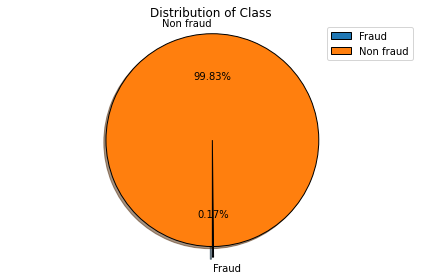

In [147]:
# Plotting pie chart for percentage of Class attribute
Fraud = df.Class[df["Class"]==1].count()
Non_fraud = df.Class[df['Class']==0].count()
labels = ['Fraud', 'Non fraud']
slices = [Fraud, Non_fraud]
explode = [0.1, 0]
plt.pie(slices, labels=labels, explode=explode, shadow=True,
startangle= -90, autopct='%1.2f%%',
wedgeprops={'edgecolor': 'black'})
plt.axis('equal') 
plt.title("Distribution of Class ")
plt.legend()
plt.tight_layout()
plt.show()

As expected, the majority of the samples are legitimate transactions. Only 0.17% of the transactions are flagged as fraudulent.It is a very unbalanced data set.

In [148]:
# Separation of input variables from target variable
X = df.drop('Class', axis=1)
y = df['Class']

## Train Test Split

In this method, the entire data set is randomly partitioned into training and test sets. I divided the
information into two parts (training and test sets). The Training set contains 80% of the records
in the data set, whereas the Test set contains 20% of the data set’s observations.

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
# Divide the dataset to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=3)

## SMOTE - Synthetic Minority Oversampling Technique

In [151]:
!pip install imblearn

In [152]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [153]:
X, y = oversample.fit_resample(X_train,y_train)
y = pd.Series(y)
y.value_counts()

0    199024
1    199024
Name: Class, dtype: int64

In [154]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics

Modeling with XGBoost

In [155]:
import xgboost as xgb
from xgboost import XGBClassifier
xg = XGBClassifier()
XGB=xg.fit(X_train,y_train)
pred_xg=xg.predict(X_test)
xg_acc = accuracy_score(y_test,pred_xg)*100
print("accuracy of XGB :", xg_acc)

accuracy of XGB : 99.95201479348805


Modeling with Random Forest Classifier

In [156]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=20)
RFC=model.fit(X_train,y_train)
RFC_predicted=RFC.predict(X_test)
RFC_acc = accuracy_score(y_test,RFC_predicted)*100
print("accuracy of Random Forest :", RFC_acc)

accuracy of Random Forest : 99.95201479348805


Modeling with Logistic Regression

In [157]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
predict_logistic=model.predict(X_test)
cf_matrix_logistic = confusion_matrix(y_test,predict_logistic)
logistic_acc = accuracy_score(y_test,predict_logistic)*100
print("accuracy of Logistic Regression :", logistic_acc)

LogisticRegression()

accuracy of Logistic Regression : 99.91807403766254


Modeling with KNN algorithm

In [158]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_k=knn.predict(X_test)
knn_acc = accuracy_score(y_test,pred_k)*100
print("accuracy of KNN :", knn_acc)

KNeighborsClassifier()

accuracy of KNN : 99.94616293903537


Modeling with Gaussian Naive Bayes classifier

In [159]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
gnb=model.fit(X_train, y_train)
gnb_predict=gnb.predict(X_test)
gnb_acc = accuracy_score(y_test,gnb_predict)*100
print("accuracy of Gaussian Naive Bayes :", gnb_acc)

accuracy of Gaussian Naive Bayes : 97.7365026977049


## Comparing Accuracies & Cross validation

In [160]:
labels = [ "XGBoost", "Random Forest", "Logistic Regression", "KNN", "Naive Bayes"]
x = [xg_acc, RFC_acc, logistic_acc, knn_acc, gnb_acc]
eval_frame = pd.DataFrame()
eval_frame['Model'] = labels
eval_frame['train_test_split'] = x
eval_frame

,Model,train_test_split
0,XGBoost,99.952
1,Random Forest,99.952
2,Logistic Regression,99.918
3,KNN,99.946
4,Naive Bayes,97.737


### K-Folds Cross Validation:

The K-Folds method is used to minimize the bias of the model. Because each data record has a
chance to appear in both the training and test data sets. The K-Folds method Divide the dataset
into k-folds in a sequence. At random, I divided the data into five folds. The four folds are then
used to fit the model, and the fifth fold is used to test it. Repeat until each fold has been used as
a test set. Then add together all the results and calculate the average. That will be the model’s
metric of success.

In [167]:
from sklearn.model_selection import KFold

In [168]:
kfold = KFold(n_splits=5)

In [169]:
# Modeling step Test differents algorithms
classifiers1 = []

In [170]:
classifiers1.append(XGBClassifier())
classifiers1.append(RandomForestClassifier())
classifiers1.append(LogisticRegression())
classifiers1.append(KNeighborsClassifier())
classifiers1.append(GaussianNB())

In [171]:
from sklearn.model_selection import cross_val_score

In [172]:
accuracy_results1 = []
for a in classifiers1 :
  accuracy_results1.append(cross_val_score(a, X_train,y_train, scoring = "accuracy", cv = kfold))

In [173]:
accuracy_results1

[array([0.99964889, 0.99952349, 0.99929777, 0.99947333, 0.99952348]),
 array([0.99957365, 0.99959873, 0.99942317, 0.99947333, 0.99949839]),
 array([0.99917237, 0.99937301, 0.99899681, 0.99924761, 0.99909711]),
 array([0.99954857, 0.99954857, 0.99937301, 0.99947333, 0.99929775]),
 array([0.97750357, 0.97690166, 0.97665087, 0.978582  , 0.97860654])]

In [174]:
accuracy_means1 = []
for e in accuracy_results1:
  accuracy_means1.append(e.mean()*100)

In [175]:
accuracy_means1

[99.94933891278566,
 99.95134527043105,
 99.91773836787337,
 99.94482446655773,
 97.76489283803122]

In [176]:
eval_frame[' kfold_5']=accuracy_means1
eval_frame

,Model,train_test_split,kfold_5
0,XGBoost,99.952,99.949
1,Random Forest,99.952,99.951
2,Logistic Regression,99.918,99.918
3,KNN,99.946,99.945
4,Naive Bayes,97.737,97.765


In [177]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

### Stratified K Fold

This cross-validation object returns stratified folds and is a variant of K-Fold. The folds are made
by keeping the percentage of samples in each class. I divided the data into five stratified folds. The
four folds are then used to fit the model, and the fifth fold is used to test it. Repeat until each fold
has been used as a test set. Then add together all the results and calculate the average. That will
be the model’s metric of success.

In [178]:
Stratifiedkfold = StratifiedKFold(n_splits= 5)

In [179]:
# Modeling step Test differents algorithms
classifiers2 = []
classifiers2.append(XGBClassifier())
classifiers2.append(RandomForestClassifier())
classifiers2.append(LogisticRegression())
classifiers2.append(KNeighborsClassifier())
classifiers2.append(GaussianNB())
accuracy_results2 = []
for classifier in classifiers2 :
  accuracy_results2.append(cross_val_score(classifier, X_train,y_train, scoring = "accuracy", cv = Stratifiedkfold))
accuracy_means2 = []
for accuracy_result in accuracy_results2:
  accuracy_means2.append(accuracy_result.mean()*100)
accuracy_means2
eval_frame['Stratifiedkfold_5']=accuracy_means2
eval_frame

[99.95234846812386,
 99.9533516406565,
 99.91974475067892,
 99.94382129402506,
 97.7653944683278]

,Model,train_test_split,kfold_5,Stratifiedkfold_5
0,XGBoost,99.952,99.949,99.952
1,Random Forest,99.952,99.951,99.953
2,Logistic Regression,99.918,99.918,99.920
3,KNN,99.946,99.945,99.944
4,Naive Bayes,97.737,97.765,97.765


### Repeated Random Test-Train Splits

This strategy combines the k-fold cross-validation method with typical train-test splits. I create
random divides of the data in the training-test set, similar to the cross-validation approach, and
then repeat the process of splitting and testing the algorithm many times. I divided the data into
five Repeated Random Test-Train Splits.

In [180]:
from sklearn.model_selection import ShuffleSplit

In [181]:
kfold = ShuffleSplit(n_splits=5,test_size=0.3)
# Modeling step Test differents algorithms
classifiers3 = []
classifiers3.append(XGBClassifier())
classifiers3.append(RandomForestClassifier())
classifiers3.append(LogisticRegression())
classifiers3.append(KNeighborsClassifier())
classifiers3.append(GaussianNB())
accuracy_results3 = []
for classifier in classifiers3 :
  accuracy_results3.append(cross_val_score(classifier, X_train,y_train, scoring = "accuracy", cv = kfold))
accuracy_means3 = []
for accuracy_result in accuracy_results3:
  accuracy_means3.append(accuracy_result.mean()*100)
accuracy_means3
eval_frame['RRTestTrainSplits_5']=accuracy_means3
eval_frame

[99.9505099481692,
 99.9541882628323,
 99.91606754723291,
 99.9391406119378,
 97.81039959872932]

,Model,train_test_split,kfold_5,Stratifiedkfold_5,RRTestTrainSplits_5
0,XGBoost,99.952,99.949,99.952,99.951
1,Random Forest,99.952,99.951,99.953,99.954
2,Logistic Regression,99.918,99.918,99.920,99.916
3,KNN,99.946,99.945,99.944,99.939
4,Naive Bayes,97.737,97.765,97.765,97.810


When I employed a train-test-split cross validation method, the best model was shown as a random forest in the table above.

In [183]:
# Confusion Matrix corresponding to XGBoost Classifier model
cf_matrix_XGB = confusion_matrix(y_test,pred_xg)
cf_matrix_XGB

array([[85281,    10],
       [   31,   121]])

Text(0.5, 1.0, 'Confusion Matrix corresponding to XGBoost Classifier algorithm')

Text(0.5, 15.0, 'Predicted Values')

Text(33.0, 0.5, 'Actual Values')

[Text(0.5, 0, '0'), Text(1.5, 0, '1')]

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

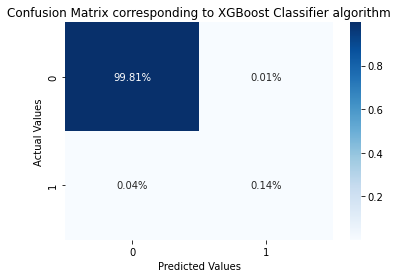

accuracy of XGB : 99.95201479348805


In [184]:
ax = sns.heatmap(cf_matrix_XGB/np.sum(cf_matrix_XGB), annot=True, fmt='.2%',cmap='Blues')
ax.set_title('Confusion Matrix corresponding to XGBoost Classifier algorithm');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');
## Ticket labels
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
## Display the visualization of the Confusion Matrix.
plt.show()
print("accuracy of XGB :", xg_acc)

When the target variable’s actual and anticipated values are both 0, this quadrant contains 99.81% of observations; when the target variable’s actual and anticipated values are both 1, 0.14% of observations fall into this quadrant.
This model is correct 99.95% of the time and erroneous 0.05% of the time, according to the data.

XGBClassifier()

(0.0, 1.0)

(0.0, 1.0)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve\n\n')

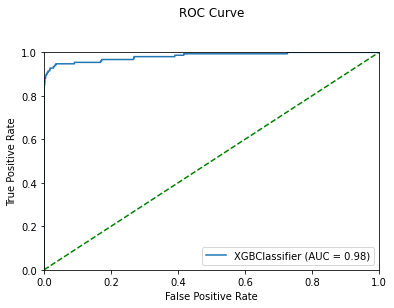

In [185]:
XGB.fit(X_train,y_train)
metrics.plot_roc_curve(XGB, X_test, y_test)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve\n\n')
plt.show()

From the above graph ,area under the curve score is 0.98. It shows that it is a perfect classifier.

In [186]:
print(classification_report(y_test,pred_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.92      0.80      0.86       152

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



Terms explanation:

True Positives: Correctly Classified Fraud Transactions

False Positives: Incorrectly Classified Fraud Transactions

True Negative: Correctly Classified Non-Fraud Transactions

False Negative: Incorrectly Classified Non-Fraud Transactions

Precision: True Positives/(True Positives + False Positives)

Recall: True Positives/(True Positives + False Negatives)

Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.

Precision/Recall Tradeoff: The more precise (selective) our model is, the less cases it will detect. 

Therefore, in this project, recall is more important than precision because we want to detect more fraud cases correctly.

In [187]:
#importannt Feature to get high accuracy in optimal model
feature_imp = pd.Series(XGB.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

V17             0.286
V14             0.090
V10             0.054
V27             0.041
V7              0.032
scaled_time     0.028
V12             0.028
V28             0.028
V26             0.028
V20             0.028
V4              0.026
V6              0.026
V9              0.025
V3              0.024
V2              0.023
V13             0.023
V8              0.019
V1              0.019
V25             0.019
V22             0.018
V15             0.018
V21             0.018
V24             0.015
V19             0.014
V11             0.013
V16             0.013
scaled_amount   0.013
V18             0.011
V23             0.010
V5              0.009
dtype: float32

Most Important feature is V17 according to XGBoost model.